<a href="https://colab.research.google.com/github/josefernandezest98/training/blob/main/SAM/SAM_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!wget -p https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

--2023-09-04 17:38:45--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 108.157.162.108, 108.157.162.83, 108.157.162.120, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|108.157.162.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth’

dl.fbaipublicfiles. 100%[===================>]   2.39G  34.8MB/s    in 28s     

2023-09-04 17:39:13 (87.2 MB/s) - ‘dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]

FINISHED --2023-09-04 17:39:13--
Total wall clock time: 28s
Downloaded: 1 files, 2.4G in 28s (87.2 MB/s)


In [14]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

In [15]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

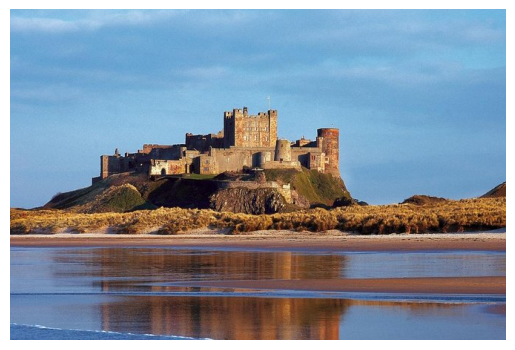

In [16]:
image = cv2.imread('bamburgh.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(image)
plt.axis('off')
plt.show()

In [9]:
sam_checkpoint = "dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth"
model_type = "vit_h"

cuda0 = torch.device('cuda:0')

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=cuda0)

RuntimeError: ignored

In [ ]:

mask_generator = SamAutomaticMaskGenerator(sam)

masks = mask_generator.generate(image)

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()